# Caracterização de eletrofáceis por meio de inteligência artificial com abordagem supervisionada
## Verificação dos dados da fusão

- **Nome do Arquivo**: verificacao_fusao.ipynb
- **Autor**: Rafael Takeguma Goto
- **Versão**: 1.2
- **Data de Criação**: 01/07/2024
- **Data de Modificação**: 03/07/2024

### Descrição: 
Este notebook contém uma etapa adicional do trabalho referente à verificação dos dados fusão, a fim de certificar que o encaixe dos dados da fusão está correta.

### Leitura dos dados da extração dlis

Leitura dos dados dos arquivos da extração dlis, que estão localizados na pasta Dados-dlis-pre-processados.

In [1]:
import glob
import pandas as pd

leituras_extracao_dlis = []      # Armazena as leituras dos arquivos .csv da extração dlis
nomes_extracao_dlis = []          # Armazena os nomes obtidos das leituras dos arquivos da extração dlis

for file in glob.glob(r'**/Dados-dlis-pre-processados' + "/*.csv", recursive=True):
    try:
        # Salva os dados da leitura
        leitura = pd.read_csv(f'{file}')
        leituras_extracao_dlis.append(leitura)

        # Salva o nome do poço
        nomes_extracao_dlis.append(file)
    except:
        print(file)

In [2]:
# Casa itens da lista 'nomes_extacao_dlis' com os itens da lista 'leituras_extracao_dlis'
pares = zip(nomes_extracao_dlis, leituras_extracao_dlis)

# Cria dicionário 'dados'
dados_extracao_dlis = dict(pares)

### Leitura dos dados da fusão do dlis com o agp

Leitura dos dados dos arquivos da fusão do dlis com o agp, que estão localizados na pasta Dados-fusao.

In [3]:
import glob
import pandas as pd

leituras_fusao = []      # Armazena as leituras dos arquivos .csv da fusão
nomes_fusao = []          # Armazena os nomes obtidos das leituras dos arquivos da fusão

for file in glob.glob(r'**/Dados-fusao' + "/*.csv", recursive=True):
    try:
        # Salva os dados da leitura
        leitura = pd.read_csv(f'{file}')
        leituras_fusao.append(leitura)

        # Salva o nome do poço
        nomes_fusao.append(file)
    except:
        print(file)

In [4]:
# Casa itens da lista 'nomes_fusao' com os itens da lista 'leituras_fusao'
pares_02 = zip(nomes_fusao, leituras_fusao)

# Cria dicionário 'dados'
dados_fusao = dict(pares_02)

### Separa os dados da curva GR nos conjuntos de dados da extração dlis e da fusão.

Os dados da curva GR serão a base para a verificação da fusão, ao comparar os registros de GR de cada poço nos dados da extração dlis e da fusão.

In [5]:
# Curvas da extração dlis que serão utilizadas para verificação
gr_tdep = ['GR', 'TDEP']

# Curvas da fusão que serão utilizadas para verificação
gr_profundidade = ['GR', 'Profundidade']

# Dicionário que armazenará os dataframes (da extração dlis) focados nessas curvas
dados_dlis_gr_tdep = {}

# Dicionário que armazenará os dataframes (da fusão) focados nessas curvas
dados_fusao_gr_profundidade = {}

# Itera para criar os dataframes focados com as curvas GR e TDEP (extração dlis)
for key, value in dados_extracao_dlis.items():
    # Cria dataframe apenas com as curvas para verificação
    dataframe_dlis_gr_tdep = value[gr_tdep]

    # Armazena o dataframe no dict
    dados_dlis_gr_tdep[key] = dataframe_dlis_gr_tdep

# Itera para criar os dataframes focados com as curvas GR e Profundidade (fusão)
for key, value in dados_fusao.items():
    # Cria um dataframe sem as linhas interpoladas
    dataframe_fusao_gr_profundidade = value[value['interpolada'] == False]
   
    # Separa apenas as curvas que serão usadas para verificação
    dataframe_fusao_gr_profundidade = dataframe_fusao_gr_profundidade[gr_profundidade]
    
    # Armazena o dataframe no dict 
    dados_fusao_gr_profundidade[key] = dataframe_fusao_gr_profundidade

### Cria gráficos de linhas para verificação.

A verificação é feita comparando os registros de GR, dos dados da extração dlis e dos dados da fusão, de cada poço. Abaixo, há uma célula para a criação da função usada para plotar esses gráficos, e na célula seguinte as chamadas dessa função para plotar o gráfico de cada poço.

In [6]:
import numpy as np
teste = np.arange(0, 151, 15)
teste_str = teste.astype(str)
teste

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150])

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Função para criar gráfico de linhas com os dados da extração dlis e da fusão
def cria_plot_gr_dlis_fusao(ax, df_dlis, df_fusao, titulo):
    x_dlis_0_150 = df_dlis['GR']
    y_dlis = df_dlis['TDEP']
    x_fusao_0_150 = df_fusao['GR']
    y_fusao = df_fusao['Profundidade']

    dlis_150_300 = df_dlis
    dlis_150_300['GR'] = dlis_150_300['GR'] - 150
    x_dlis_150_300 = dlis_150_300['GR']
    y_dlis_150_300 = dlis_150_300['TDEP']
    
    fusao_150_300 = df_fusao
    fusao_150_300['GR'] = fusao_150_300['GR'] - 150
    x_fusao_150_300 = fusao_150_300['GR']
    y_fusao_150_300 = fusao_150_300['Profundidade']
    

    # Plots para valores no intervalo (0, 150)
    ax.plot(x_dlis_0_150, y_dlis, label='Dados da extração dlis', color='blue', linewidth=5, zorder=2)
    ax.plot(x_fusao_0_150, y_fusao, label='Dados da fusão', color='red', zorder=2)

    # Plots para valores no intervalo (150, 300)
    ax.plot(x_dlis_150_300, y_dlis_150_300, color='blue', linewidth=5, zorder=2)
    ax.plot(x_fusao_150_300, y_fusao_150_300, color='red', zorder=2)
    
    # Definir os ticks do eixo x de 15 em 15
    ticks_eixo_x = [0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150]
    
    # Define os labels do eixo x
    labels_eixo_x = ['0\n150', '15\n165', '30\n180',  '45\n195',  '60\n210',  '75\n225',  '90\n240', '105\n255', '120\n270', '135\n285', '150\n300']
    ax.set_xticks(ticks_eixo_x)

    # Define as labels dos ticks no eixo x como strings
    ax.set_xticklabels(labels_eixo_x)

    # Mover os rótulos do eixo x para o topo
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

    # Define o intervalo dos rótulos do eixo y para 50 unidades
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}' if x % 50 == 0 else ''))

    # Remove traços dos eixos
    ax.tick_params(axis='x', which='both', bottom=False, top=False)  
    ax.tick_params(axis='y', which='both', left=False, right=False)  

    # Add grid
    ax.grid(True, axis='both', zorder=0)

    # Faz o grid do eixo y ser de 5 em 5
    ax.yaxis.set_major_locator(plt.MultipleLocator(5))

    # Invertendo o eixo y
    ax.invert_yaxis()

    # Limita o intervalo do GR de 0 a 150
    ax.set_xlim(0, 150)
    
    ax.set_title(titulo, fontweight='bold')
    ax.set_xlabel('GR', fontweight='bold')
    ax.set_ylabel('TDEP', fontweight='bold')
    
    ax.legend()

C:\Users\rafae\AppData\Local\Temp\ipykernel_19724\4245964302.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dlis_150_300['GR'] = dlis_150_300['GR'] - 150
C:\Users\rafae\AppData\Local\Temp\ipykernel_19724\4245964302.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dlis_150_300['GR'] = dlis_150_300['GR'] - 150
C:\Users\rafae\AppData\Local\Temp\ipykernel_19724\4245964302.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

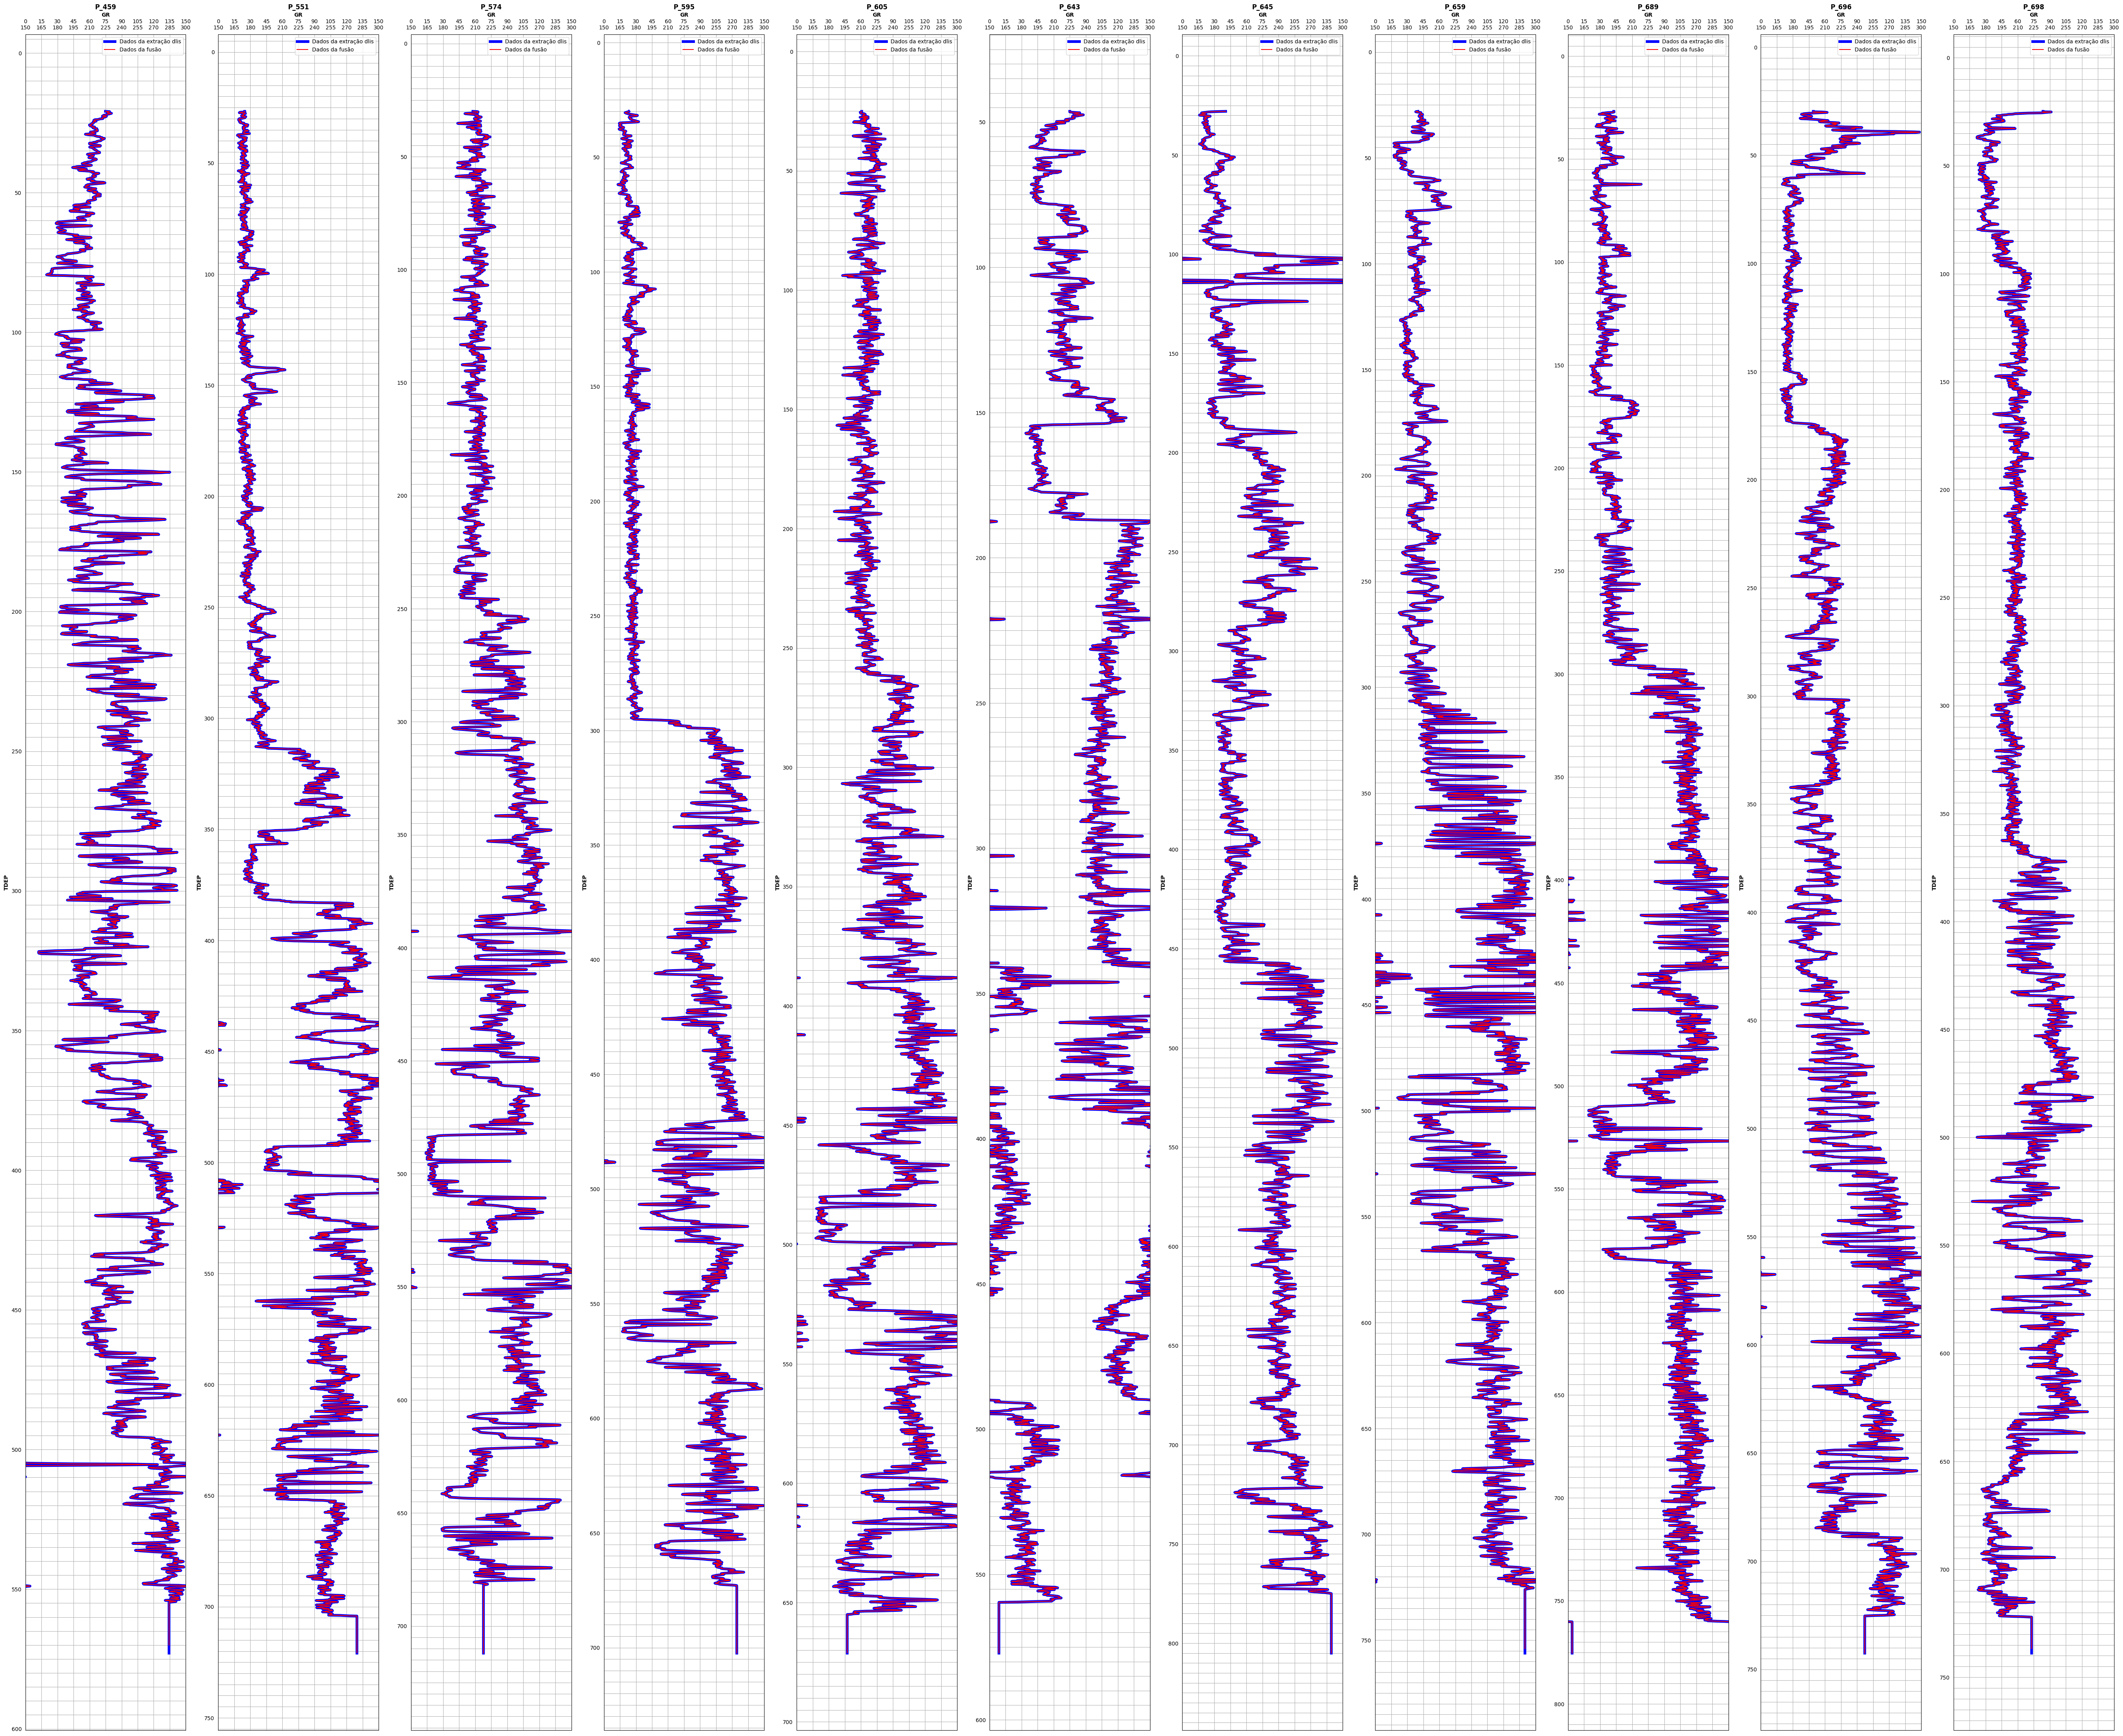

In [8]:
# Criando a figura e os eixos
fig, axs = plt.subplots(1, 11, figsize=(55, 45))

# P_459
cria_plot_gr_dlis_fusao(axs[0], dados_dlis_gr_tdep['Dados-dlis-pre-processados\\curvas_1-BRSA-459-SE.csv'], 
                        dados_fusao_gr_profundidade['Dados-fusao\\merged_1-BRSA-459-SE.csv'], 'P_459')

# P_551
cria_plot_gr_dlis_fusao(axs[1], dados_dlis_gr_tdep['Dados-dlis-pre-processados\\curvas_1-FSG-1-SE.csv'], 
                        dados_fusao_gr_profundidade['Dados-fusao\\merged_1-BRSA-551-SE.csv'], 'P_551')

# P_574
cria_plot_gr_dlis_fusao(axs[2], dados_dlis_gr_tdep['Dados-dlis-pre-processados\\curvas_1-FSJQ-1-SE.csv'], 
                        dados_fusao_gr_profundidade['Dados-fusao\\merged_1-BRSA-574-SE.csv'], 'P_574')

# P_595
cria_plot_gr_dlis_fusao(axs[3], dados_dlis_gr_tdep['Dados-dlis-pre-processados\\curvas_1-BRSA-595-SE.csv'], 
                        dados_fusao_gr_profundidade['Dados-fusao\\merged_1-BRSA-595-SE.csv'], 'P_595')

# P_605
cria_plot_gr_dlis_fusao(axs[4], dados_dlis_gr_tdep['Dados-dlis-pre-processados\\curvas_1-BRSA-605-SE.csv'], 
                        dados_fusao_gr_profundidade['Dados-fusao\\merged_1-BRSA-605-SE.csv'], 'P_605')

# P_643
cria_plot_gr_dlis_fusao(axs[5], dados_dlis_gr_tdep['Dados-dlis-pre-processados\\curvas_1-BRSA-643-SE.csv'], 
                        dados_fusao_gr_profundidade['Dados-fusao\\merged_1-BRSA-643-SE.csv'], 'P_643')

# P_645
cria_plot_gr_dlis_fusao(axs[6], dados_dlis_gr_tdep['Dados-dlis-pre-processados\\curvas_1-BRSA-645-SE.csv'], 
                        dados_fusao_gr_profundidade['Dados-fusao\\merged_1-BRSA-645-SE.csv'], 'P_645')

# P_659
cria_plot_gr_dlis_fusao(axs[7], dados_dlis_gr_tdep['Dados-dlis-pre-processados\\curvas_1-BRSA-659-SE.csv'], 
                        dados_fusao_gr_profundidade['Dados-fusao\\merged_1-BRSA-659-SE.csv'], 'P_659')

# P_689
cria_plot_gr_dlis_fusao(axs[8], dados_dlis_gr_tdep['Dados-dlis-pre-processados\\curvas_1-POI-1-SE.csv'], 
                        dados_fusao_gr_profundidade['Dados-fusao\\merged_1-BRSA-689-SE.csv'], 'P_689')

# P_696
cria_plot_gr_dlis_fusao(axs[9], dados_dlis_gr_tdep['Dados-dlis-pre-processados\\curvas_1-BRSA-696-SE.csv'], 
                        dados_fusao_gr_profundidade['Dados-fusao\\merged_1-BRSA-696-SE.csv'], 'P_696')

# P_698
cria_plot_gr_dlis_fusao(axs[10], dados_dlis_gr_tdep['Dados-dlis-pre-processados\\curvas_1-DP-2-SE.csv'], 
                        dados_fusao_gr_profundidade['Dados-fusao\\merged_1-BRSA-698-SE.csv'], 'P_698')

# Ajustando o layout para evitar sobreposição de elementos
plt.tight_layout()

plt.show()